In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# **01). Import dataset and Explore dataset type and Quntity**




In [132]:
data = pd.read_csv('/content/heart_disease.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,NaN,138,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


In [133]:
print('Shape of the data is ', data.shape)

Shape of the data is  (918, 12)


In [134]:
data.dtypes

,0
Age,float64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,float64
FastingBS,float64
RestingECG,object
MaxHR,float64
ExerciseAngina,object
Oldpeak,float64


# **02). Dataset Preprocessing**

In [135]:
# Check for null values
print(data.isnull().sum())

Age                5
Sex                6
ChestPainType      5
RestingBP          0
Cholesterol        6
FastingBS          1
RestingECG        13
MaxHR              2
ExerciseAngina     2
Oldpeak            0
ST_Slope           5
HeartDisease       2
dtype: int64


In [136]:
# Drop All null Values
data = data.dropna()

In [137]:
print(data.isnull().sum())
print(data.shape)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
(875, 12)


In [138]:
#print characters colum values
print(data['Sex'].unique())
print(data['ChestPainType'].unique())
print(data['RestingECG'].unique())
print(data['ExerciseAngina'].unique())
print(data['ST_Slope'].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [139]:
# Sample columns that need encoding
binary_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Encode binary columns with 1 and 0
binary_mapping = {
    'M': 1, 'F': 0,
    'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3,
    'Normal': 0, 'ST': 1, 'LVH': 2,
    'N': 0, 'Y': 1,
    'Up': 0, 'Flat': 1, 'Down': 2

}

for col in binary_columns:
    data[col] = data[col].map(binary_mapping)

# Check encoding results
print(data.head())

    Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0  40.0    1              0        140        289.0        0.0           0   
1  49.0    0              1        160        180.0        0.0           0   
2  37.0    1              0        130        283.0        0.0           1   
4  54.0    1              1        150        195.0        0.0           0   
5  39.0    1              1        120        339.0        0.0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0  172.0               0      0.0         0           0.0  
1  156.0               0      1.0         1           1.0  
2   98.0               0      0.0         0           0.0  
4  122.0               0      0.0         0           0.0  
5  170.0               0      0.0         0           0.0  


In [140]:
data.dtypes

,0
Age,float64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,float64
FastingBS,float64
RestingECG,int64
MaxHR,float64
ExerciseAngina,int64
Oldpeak,float64


In [141]:
print(data)

      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    40.0    1              0        140        289.0        0.0           0   
1    49.0    0              1        160        180.0        0.0           0   
2    37.0    1              0        130        283.0        0.0           1   
4    54.0    1              1        150        195.0        0.0           0   
5    39.0    1              1        120        339.0        0.0           0   
..    ...  ...            ...        ...          ...        ...         ...   
913  45.0    1              3        110        264.0        0.0           0   
914  68.0    1              2        144        193.0        1.0           0   
915  57.0    1              2        130        131.0        0.0           0   
916  57.0    0              0        130        236.0        0.0           2   
917  38.0    1              1        138        175.0        0.0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST

# **03). Dataset Training**

In [142]:
# Separate features and target variable
X = data.drop('HeartDisease', axis=1)  # Features
y = data['HeartDisease']              # Target


In [143]:
print(X)

      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    40.0    1              0        140        289.0        0.0           0   
1    49.0    0              1        160        180.0        0.0           0   
2    37.0    1              0        130        283.0        0.0           1   
4    54.0    1              1        150        195.0        0.0           0   
5    39.0    1              1        120        339.0        0.0           0   
..    ...  ...            ...        ...          ...        ...         ...   
913  45.0    1              3        110        264.0        0.0           0   
914  68.0    1              2        144        193.0        1.0           0   
915  57.0    1              2        130        131.0        0.0           0   
916  57.0    0              0        130        236.0        0.0           2   
917  38.0    1              1        138        175.0        0.0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST

In [144]:
print(y)

0      0.0
1      1.0
2      0.0
4      0.0
5      0.0
      ... 
913    1.0
914    1.0
915    1.0
916    1.0
917    0.0
Name: HeartDisease, Length: 875, dtype: float64


In [145]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
# Train the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [149]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [150]:
RandamForest_model = RandomForestClassifier(n_estimators=100, random_state=42)
RandamForest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **04). Dataset performance**

In [151]:
#Perfomences of the SVM
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", round(accuracy_svm, 3) )
precision_svm = precision_score(y_test, y_pred_svm)
print("SVM Precision:", round(precision_svm, 3))
recall_svm = recall_score(y_test, y_pred_svm)
print("SVM recall:", round(recall_svm, 3))
f1_svm = f1_score(y_test, y_pred_svm)
print("SVM F1 Score:", round(f1_svm, 3))

SVM Accuracy: 0.772
SVM Precision: 0.807
SVM recall: 0.796
SVM F1 Score: 0.801


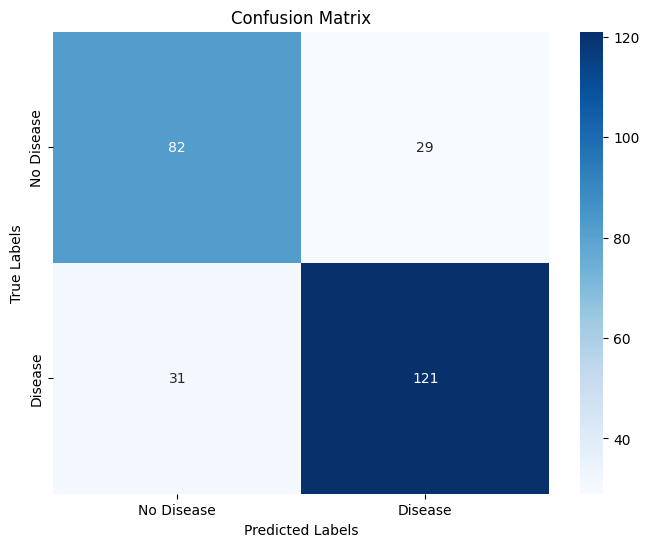

In [152]:
#svm confusion matrix using seaboan
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [153]:
#Perfomences of the knn
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", round(accuracy_knn,3))
precision_knn = precision_score(y_test, y_pred_knn)
print("KNN Precision:", round(precision_knn, 3))
recall_knn = recall_score(y_test, y_pred_knn)
print("KNN recall:", round(recall_knn, 3))
f1_knn = f1_score(y_test, y_pred_knn)
print("KNN F1 Score:", round(f1_svm, 3))

KNN Accuracy: 0.719
KNN Precision: 0.767
KNN recall: 0.737
KNN F1 Score: 0.801


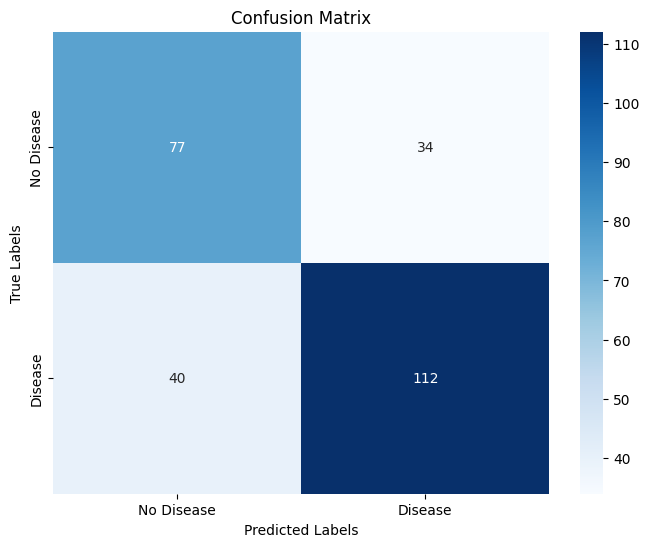

In [154]:
#knn confusion matrix using seaboan
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [155]:
#Perfomences of the RF
y_pred_rf = RandamForest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RandamForest Accuracy:", round(accuracy_rf, 3))
precision_rf = precision_score(y_test, y_pred_rf)
print("RandamForest Precision:", round(precision_rf, 3))
recall_rf = recall_score(y_test, y_pred_rf)
print("RandamForest recall:", round(recall_rf,3))
f1_rf = f1_score(y_test, y_pred_rf)
print("RandamForest F1 Score:", round(f1_rf, 3))

RandamForest Accuracy: 0.886
RandamForest Precision: 0.886
RandamForest recall: 0.921
RandamForest F1 Score: 0.903


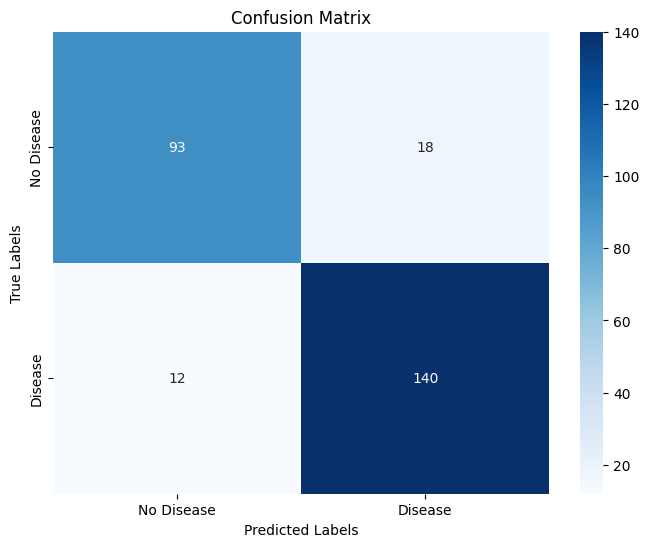

In [156]:
#Randamforest confusion matrix using seaboan
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [157]:
# results Table for SVM, KNN, and Random Forest as follows
results = {
    "Model": ["SVM", "KNN", "Random Forest"],
    "Accuracy": [accuracy_svm , accuracy_knn, accuracy_rf],
    "Precision": [precision_svm , precision_knn, precision_rf],
    "Recall": [recall_svm , recall_knn, recall_rf],
    "F1-Score": [f1_svm, f1_knn, f1_rf],
}

# Create a dataframe
comparison_df = pd.DataFrame(results)

# Print the table
print(comparison_df)

           Model  Accuracy  Precision    Recall  F1-Score
0            SVM  0.771863   0.806667  0.796053  0.801325
1            KNN  0.718631   0.767123  0.736842  0.751678
2  Random Forest  0.885932   0.886076  0.921053  0.903226


In [159]:
# Define the cross-validation strategy (e.g., 10-fold) for SVM
cv_svm = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores
cv_scores_svm = cross_val_score(svm_model, X, y, cv=cv_svm, scoring='accuracy')

# Output the results
print("Cross-Validation Scores:", cv_scores_svm)
print("Mean Accuracy:", np.mean(cv_scores_svm,))
print("Standard Deviation:", np.std(cv_scores_svm))

Cross-Validation Scores: [0.75       0.75       0.70454545 0.78409091 0.71590909 0.68965517
 0.70114943 0.59770115 0.79310345 0.68965517]
Mean Accuracy: 0.7175809822361547
Standard Deviation: 0.05348157716659597


In [161]:
# Define the cross-validation strategy (e.g., 10-fold) for KNN
cv_knn = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores
cv_scores_knn = cross_val_score(knn_model, X, y, cv=cv_knn, scoring='accuracy')

# Output the results
print("Cross-Validation Scores:", cv_scores_knn)
print("Mean Accuracy:", np.mean(cv_scores_knn))
print("Standard Deviation:", np.std(cv_scores_knn))

Cross-Validation Scores: [0.73863636 0.75       0.70454545 0.68181818 0.71590909 0.68965517
 0.64367816 0.6091954  0.74712644 0.70114943]
Mean Accuracy: 0.698171368861024
Standard Deviation: 0.0427908059291661


In [162]:
# Define the cross-validation strategy (e.g., 10-fold) for Random Forest
cv_rf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores
cv_scores_rf = cross_val_score(RandamForest_model, X, y, cv=cv_rf, scoring='accuracy')

# Output the results
print("Cross-Validation Scores:", cv_scores_rf)
print("Mean Accuracy:", np.mean(cv_scores_rf))
print("Standard Deviation:", np.std(cv_scores_rf))

Cross-Validation Scores: [0.88636364 0.86363636 0.85227273 0.88636364 0.82954545 0.88505747
 0.85057471 0.83908046 0.88505747 0.86206897]
Mean Accuracy: 0.8640020898641589
Standard Deviation: 0.020042021332142022


In [163]:
# The results for SVM, KNN, and Random Forest in 10-fold cross validation
results_10fold = {
    "Model": ["SVM", "KNN", "Random Forest"],
    "Mean Accuracy": [np.mean(cv_scores_svm) , np.mean(cv_scores_knn), np.mean(cv_scores_rf)],
    "Standard Deviation": [np.std(cv_scores_svm) , np.std(cv_scores_knn), np.std(cv_scores_rf)],
}

# Create a dataframe
comparison_df = pd.DataFrame(results_10fold)

# Print the table
print(comparison_df)

           Model  Mean Accuracy  Standard Deviation
0            SVM       0.717581            0.053482
1            KNN       0.698171            0.042791
2  Random Forest       0.864002            0.020042
